# Predicción del desempeño de alumnos en la materia Matemática. Análisis de los principales factores que influyen en el desempeño.

Trabajo realizado en el marco del Hackatón de Datos Educativos 2020, organizado por Argentinos por la Educación.
Autores: Ariel Fleiderman, Carlos Rodríguez, Gabriela Rau, Teo Saralegui y Edwin Jhony Chirre Ramírez.

El trabajo consistió en un modelo de Machine Learning que predice a través de un target binario el desempeño -bueno o malo- de los alumnos en las pruebas Aprender en la materia Matemática.

Aprender es el dispositivo nacional de evaluación de los aprendizajes de los estudiantes y de sistematización de información acerca de algunas condiciones en las que ellos se desarrollan.

Más info: https://www.argentina.gob.ar/educacion/aprender

### Principales interrogantes

¿Se puede predecir el desempeño de los alumnos en las pruebas Aprender? ¿Qué factores inciden sobre los resultados de las pruebas Aprender? ¿Son factores endógenos o exógenos al sistema educativo? Identificar variables que puedan ayudar a diseñar estrategias para mejorar el nivel de aprendizaje.

In [1]:
import pandas as pd               #Manejo de Datos
import numpy as np                #Calculo numerico
import seaborn as sns             #Libreria de Visualizaciones
import matplotlib.pyplot as plt   #Libreria de Visualizaciones

# Análisis exploratorio de Datasets

In [4]:
data_alumnos = pd.read_csv('app_alumno.csv')


/home/gr/anaconda3/envs/ent7/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_alumnos.head(5)

,id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,ponderador_lengua,ponderador_matematica,ponderador_ciencias_naturales,...,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,tiene_internet,repeticion_primaria,repeticion_secundaria,escuela_id,nivel_id,year_id
0,1,nc,NaN,satisfactorio,nc,satisfactorio,satisfactorio,-1.00000,35.920963,42.752556,...,nc,nc,nc,nc,nc,nc,nc,120240006,2,2013
1,2,nc,NaN,satisfactorio,nc,satisfactorio,nc,-1.00000,35.920963,-1.000000,...,nc,nc,nc,nc,nc,nc,nc,180540909,2,2013
2,3,nc,NaN,satisfactorio,basico,nc,nc,33.28981,35.920963,-1.000000,...,nc,nc,nc,nc,nc,nc,nc,220168311,2,2013
3,4,nc,NaN,avanzado,avanzado,satisfactorio,satisfactorio,33.28981,35.920963,42.752556,...,nc,nc,nc,nc,nc,nc,nc,240757212,2,2013
4,5,nc,NaN,basico,satisfactorio,nc,basico,33.28981,35.920963,42.752556,...,nc,nc,nc,nc,nc,nc,nc,262003313,2,2013


In [6]:
data_alumnos['sexo'].value_counts()

nc    823198
f     516327
m     496185
Name: sexo, dtype: int64

In [7]:
data_alumnos['tiene_smarttv'].value_counts()

nc    1081758
no     382973
si     370979
Name: tiene_smarttv, dtype: int64

In [8]:
data_alumnos['nivel_id'].value_counts()

2    1151819
3     683891
Name: nivel_id, dtype: int64

In [9]:
data_alumnos['indice_socioeconomico'].value_counts()

medio    805723
alto     228694
nc       227551
bajo     201202
Name: indice_socioeconomico, dtype: int64

In [10]:
data_alumnos['tiene_internet'].value_counts()

nc    1081758
si     508061
no     245891
Name: tiene_internet, dtype: int64

In [11]:
data_alumnos['tiene_cable'].value_counts()

nc    1081758
si     439973
no     313979
Name: tiene_cable, dtype: int64

In [12]:
data_alumnos['year_id'].value_counts()

2016    893223
2017    569947
2013    372540
Name: year_id, dtype: int64

In [13]:
data_alumnos['repeticion_secundaria'].value_counts()

nc                  1776221
no                    49110
una_vez                7656
dos_veces              2202
tres_veces_o_mas        521
Name: repeticion_secundaria, dtype: int64

In [14]:
data_alumnos['repeticion_primaria'].value_counts()

no                  963219
nc                  753052
una_vez              95641
dos_veces            17853
tres_veces_o_mas      5945
Name: repeticion_primaria, dtype: int64

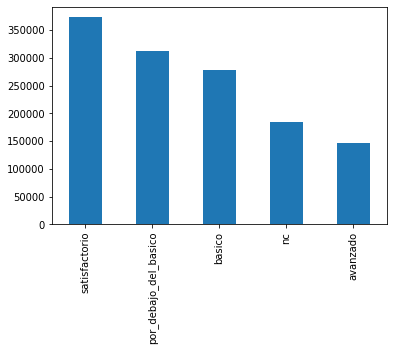

In [15]:
data_alumnos['nivel_desemp_matematica'].value_counts().plot.bar()

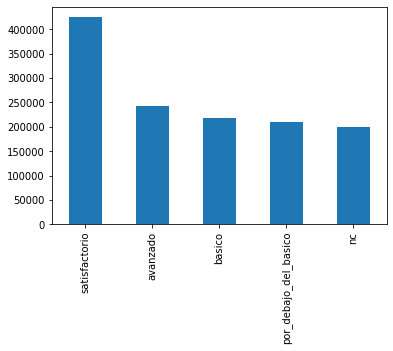

In [16]:
data_alumnos['nivel_desemp_lengua'].value_counts().plot.bar()

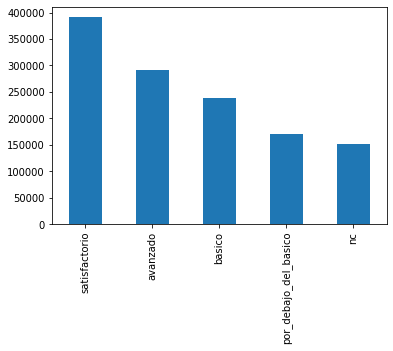

In [17]:
data_alumnos['nivel_desemp_ciencias_sociales'].value_counts().plot.bar()

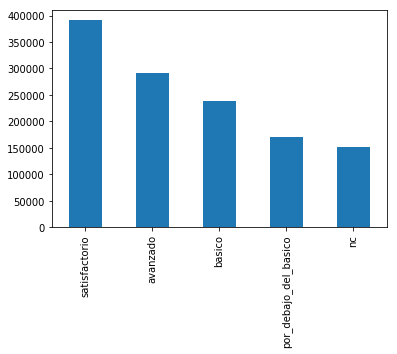

In [18]:
data_alumnos['nivel_desemp_ciencias_sociales'].value_counts().plot.bar()

In [18]:
data_salarios = pd.read_csv('app_salario.csv')


In [19]:
data_salarios.rename(columns = {'provincias_id': 'provincia_id'}, inplace = True)

In [20]:
data_salarios.head()

,id,name,value,provincia_id,year_id
0,1,maestro_inicial,3239.80,4,2011
1,2,maestro_inicial,3952.38,4,2012
2,3,maestro_inicial,4927.31,4,2013
3,4,maestro_inicial,6458.29,4,2014
4,5,maestro_inicial,8521.76,4,2015


In [21]:
pd.pivot_table(data_salarios, index=['name'],
                        columns=['provincia_id'],
                        values=['value'],
                        )

value                            \
provincia_id                        0            1            2    
name                                                               
director_primaria         10590.300000  8032.363333  8208.303333   
director_secundaria        9612.251667  8741.111667  9898.366667   
maestro_de_grado           6536.330000  5295.845000  6611.308333   
maestro_inicial            6536.330000  5322.810000  6837.931667   
profesor_secundaria_15hs   6186.735000  6272.420000  7033.627500   
profesor_snu               6186.735000  6274.185000  6748.882500   

                                                                    \
provincia_id                        3             4             5    
name                                                                 
director_primaria         15861.793333  15591.468333  11191.198333   
director_secundaria       14380.531667  14891.018333  11737.846667   
maestro_de_grado           7942.108333   6479.161667   6057.721667   
maestro_inicial            7942.108333   6474.033333   6103.966667   
profesor_secundaria_15hs   7469.485000   6194.530000   6851.005000   
profesor_snu               7438.262500   5570.637500   6789.287500   

                                                                    \
provincia_id                        6             7             8    
name                                                                 
director_primaria         11649.725000   9495.528333   9169.688333   
director_secundaria       13340.688333  10796.145000  12860.746667   
maestro_de_grado           8700.723333   6447.763333   5463.141667   
maestro_inicial            8700.723333   6509.451667   5550.605000   
profesor_secundaria_15hs   7711.210000   5344.980000   6644.375000   
profesor_snu               7141.452500   5534.207500   6637.830000   

                                        ...                              \
provincia_id                        9   ...            14            15   
name                                    ...                               
director_primaria         10893.456667  ...  15896.618333  11977.723333   
director_secundaria       12436.906667  ...  16202.193333  12326.946667   
maestro_de_grado           6736.598333  ...   8015.066667   6688.251667   
maestro_inicial            6133.965000  ...   8142.171667   6688.251667   
profesor_secundaria_15hs   7466.802500  ...   7573.367500   5373.532500   
profesor_snu               7767.230000  ...   6673.295000   5939.677500   

                                                                    \
provincia_id                        16            17            18   
name                                                                 
director_primaria         10242.498333  10097.433333  11988.693333   
director_secundaria       10232.015000  10885.628333  11988.693333   
maestro_de_grado           6888.640000   6697.511667   7122.748333   
maestro_inicial            7299.358333   6720.260000   7087.830000   
profesor_secundaria_15hs   6817.185000   7809.622500   8580.820000   
profesor_snu               6166.342500   7700.402500   8405.772500   

                                                                   \
provincia_id                        19            20           21   
name                                                                
director_primaria         23895.288333  13268.220000  7708.900000   
director_secundaria       23895.288333  14258.946667  8239.858333   
maestro_de_grado          10877.638333   8297.658333  5275.370000   
maestro_inicial           10877.638333   8296.828333  5310.771667   
profesor_secundaria_15hs  11115.475000   6230.132500  6135.082500   
profesor_snu              10739.050000   6227.882500  6129.317500   

                                                      
provincia_id                        22            23  
name                                                  
director_primaria         21334.815000  11861.920000  
director_

In [22]:
data_escuela = pd.read_csv('app_escuela.csv')


In [23]:
data_escuela.head()

,id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,departamento_id,provincia_id
0,11341915221,urbano,estatal,0.656,critico,1.000000,tercil_bajo,f,f,No corresponde,provincial,178.0,13
1,2317536438,urbano,privada,-1.000,NaN,2.133333,tercil_alto,f,t,Subvención Total,provincial,44.0,0
2,1143119819,urbano,estatal,0.101,bajo_y_medio,1.833333,tercil_medio,f,f,No corresponde,provincial,1.0,0
3,8740979823,urbano,estatal,0.452,alto,1.652174,tercil_bajo,f,t,No corresponde,provincial,136.0,9
4,12420777423,rural,estatal,0.666,critico,1.000000,tercil_bajo,f,t,No corresponde,provincial,168.0,13


In [24]:
data_escuela.rename(columns = {'id': 'escuela_id'}, inplace = True)

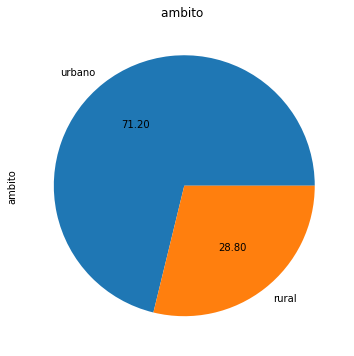

In [25]:
plot = data_escuela['ambito'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='ambito ')

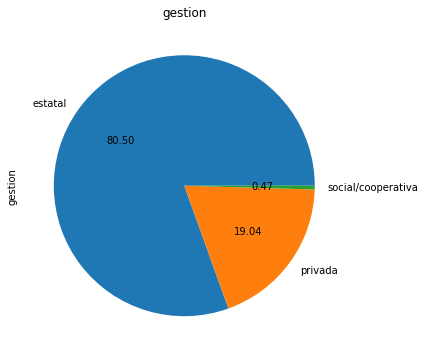

In [26]:
plot = data_escuela['gestion'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='gestion')

In [27]:
data_escuela['tecnica'].value_counts()

f    64258
t     1474
Name: tecnica, dtype: int64

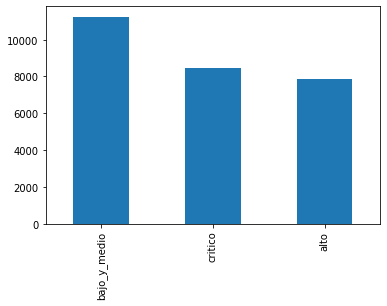

In [28]:
data_escuela['icse_cat'].value_counts().plot.bar()

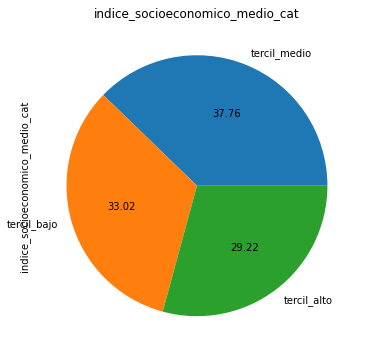

In [29]:
plot = data_escuela['indice_socioeconomico_medio_cat'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='indice_socioeconomico_medio_cat')

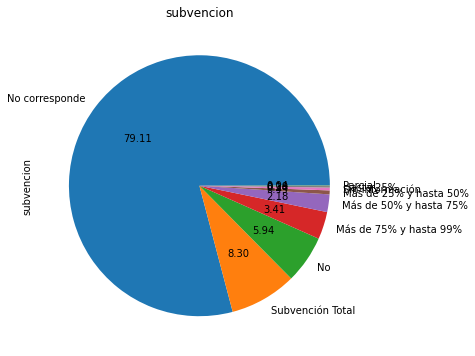

In [30]:
plot = data_escuela['subvencion'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='subvencion')

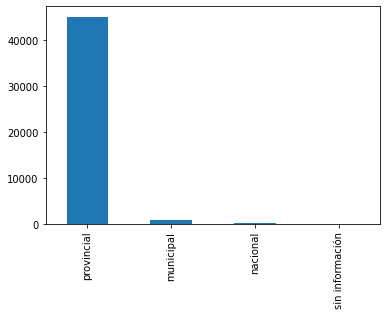

In [31]:
data_escuela['dependencia'].value_counts().plot.bar()

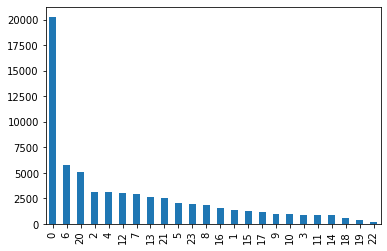

In [32]:
data_escuela['provincia_id'].value_counts().plot.bar()

In [35]:
data_gastos = pd.read_csv('app_gastonivel.csv')
data_gastos.head(5)

,id,name,value,provincia_id,year_id
0,1,inicial+primaria,9901979445,0,2011
1,2,privada,4088816402,0,2011
2,3,secundaria,12062368629,0,2011
3,4,sin_discriminar,4866835425,0,2011
4,5,snu,927565827,0,2011


In [36]:
data_gastos_objeto = pd.read_csv('app_gastoobjeto.csv')


In [37]:
data_gastos_objeto.head(5)

,id,name,value,provincia_id,year_id
0,1,bienes_y_servicios_no_personales,1.767565e+08,2,2011
1,2,erogacion_de_capital,2.587709e+08,2,2011
2,3,personal,2.650768e+09,2,2011
3,4,transferencias_educacion_privada,1.613470e+08,2,2011
4,5,transferencias_otras,9.722960e+07,2,2011


In [38]:
data_horas = pd.read_csv('app_hora.csv')
data_horas.head()

,id,name,total,cubierto,no_cubierto,escuela_id,nivel_id,year_id
0,1,dictado_de_clases,6,6,0,420000707,1,2011
1,2,dictado_de_clases,48,48,0,840477414,2,2011
2,3,dictado_de_clases,2026,2026,0,918751515,3,2011
3,4,dictado_de_clases,12,12,0,1100466018,1,2011
4,5,dictado_de_clases,3,3,0,1265777121,2,2011


In [187]:
data_horas['no_cubierto'].value_counts()

0       282063
3         2007
6         1667
4         1472
2         1215
12        1175
9          700
8          642
10         632
24         605
1          600
5          533
18         507
7          447
15         380
14         314
16         302
22         283
11         278
20         270
13         270
30         234
21         222
27         202
36         186
17         154
19         142
25         140
26         121
33         116
         ...  
325          1
323          1
322          1
320          1
575          1
316          1
315          1
354          1
616          1
141          1
379          1
652          1
651          1
394          1
391          1
645          1
389          1
900          1
387          1
888          1
617          1
375          1
886          1
374          1
1397         1
373          1
368          1
366          1
363          1
615          1
Name: no_cubierto, Length: 340, dtype: int64

In [39]:
data_provincias = pd.read_csv('app_provincia.csv')
data_provincias.head(5)

,id,name
0,0,Buenos Aires
1,1,Catamarca
2,2,Chaco
3,3,Chubut
4,4,Ciudad de Buenos Aires


In [40]:
data_provincias.rename(columns = {'name': 'provincia_name'}, inplace = True)

In [41]:
data_provincias.rename(columns = {'id': 'provincia_id'}, inplace = True)

In [42]:
fulldata_alumnos = data_alumnos.merge(data_escuela, on = 'escuela_id')
fulldata_alumno = fulldata_alumnos.merge(data_provincias, on = 'provincia_id')

In [43]:
fulldata_provincia2 = data_provincias.merge(data_gastos_objeto, on = 'provincia_id')

In [44]:
fulldata_provincia1 = fulldata_provincia2.merge(data_gastos, on = 'provincia_id')

In [45]:
fulldata_provincia = fulldata_provincia1.merge(data_salarios, on = 'provincia_id')

In [46]:
fulldata_provincia.rename(columns = {'value_y': 'gastos totales'}, inplace = True)

In [47]:
fulldata_provincia.rename(columns = {'name_y': 'escolaridad'}, inplace = True)

In [48]:
fulldata_provincia.rename(columns = {'name_x': 'rubro'}, inplace = True)

In [49]:
fulldata_provincia.rename(columns = {'value_x': 'gasto rubro'}, inplace = True)
fulldata_provincia.rename(columns = {'value': 'sueldo'}, inplace = True)


In [50]:
fulldata_provincia.head()

,provincia_id,provincia_name,id_x,rubro,gasto rubro,year_id_x,id_y,escolaridad,gastos totales,year_id_y,id,name,sueldo,year_id
0,0,Buenos Aires,211,bienes_y_servicios_no_personales,6.098490e+08,2011,1,inicial+primaria,9901979445,2011,7,maestro_inicial,3368.56,2011
1,0,Buenos Aires,211,bienes_y_servicios_no_personales,6.098490e+08,2011,1,inicial+primaria,9901979445,2011,8,maestro_inicial,4092.59,2012
2,0,Buenos Aires,211,bienes_y_servicios_no_personales,6.098490e+08,2011,1,inicial+primaria,9901979445,2011,9,maestro_inicial,4620.98,2013
3,0,Buenos Aires,211,bienes_y_servicios_no_personales,6.098490e+08,2011,1,inicial+primaria,9901979445,2011,10,maestro_inicial,6196.51,2014
4,0,Buenos Aires,211,bienes_y_servicios_no_personales,6.098490e+08,2011,1,inicial+primaria,9901979445,2011,11,maestro_inicial,8906.20,2015


In [51]:
fulldata_alumno.head()

,id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,ponderador_lengua,ponderador_matematica,ponderador_ciencias_naturales,...,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet_y,subvencion,dependencia,departamento_id,provincia_id,provincia_name
0,1,nc,NaN,satisfactorio,nc,satisfactorio,satisfactorio,-1.00000,35.920963,42.752556,...,bajo_y_medio,-1.0,NaN,f,t,No corresponde,provincial,87.0,4,Ciudad de Buenos Aires
1,505,nc,NaN,nc,avanzado,avanzado,satisfactorio,33.28981,-1.000000,42.752556,...,bajo_y_medio,-1.0,NaN,f,t,No corresponde,provincial,87.0,4,Ciudad de Buenos Aires
2,1008,nc,NaN,nc,satisfactorio,basico,satisfactorio,33.28981,-1.000000,42.752556,...,bajo_y_medio,-1.0,NaN,f,t,No corresponde,provincial,87.0,4,Ciudad de Buenos Aires
3,1511,nc,NaN,basico,nc,nc,basico,-1.00000,35.920963,42.752556,...,bajo_y_medio,-1.0,NaN,f,t,No corresponde,provincial,87.0,4,Ciudad de Buenos Aires
4,2014,nc,NaN,por_debajo_del_basico,por_debajo_del_basico,basico,por_debajo_del_basico,33.28981,35.920963,42.752556,...,bajo_y_medio,-1.0,NaN,f,t,No corresponde,provincial,87.0,4,Ciudad de Buenos Aires


In [52]:
data_filtrado=fulldata_alumno[fulldata_alumno['year_id'] > 2013]

In [53]:
data_filtrado.drop(columns = ['id','nivel_desemp_lengua',
 'nivel_desemp_ciencias_sociales','provincia_name', 'nivel_desemp_ciencias_sociales','provincia_name'
,'nivel_desemp_ciencias_naturales','ponderador_lengua','ponderador_ciencias_naturales',
 'ponderador_ciencias_sociales','year_id','escuela_id',
'departamento_id', 'icse','indice_socioeconomico_medio'], inplace=True)

/home/gr/anaconda3/envs/ent7/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
nullColumns = []    #Lista que contendrá las columnas con valores Nulos
for column in data_filtrado.columns:
    if data_filtrado[column].isnull().sum() > 0:
        print(column, data_filtrado[column].isnull().sum())
        nullColumns.append(column)

nivel_desemp_matematica 539886
ponderador_matematica 109030
icse_cat 492236
indice_socioeconomico_medio_cat 11036
tiene_internet_y 75026
subvencion 150
dependencia 150


In [55]:
data_filtrado.loc[data_filtrado['indice_socioeconomico_medio_cat'].isnull(), 'indice_socioeconomico_medio_cat'] = 'LTE'
data_filtrado.loc[data_filtrado['tiene_internet_y'].isnull(), 'tiene_internet_y'] = 't'
data_filtrado.loc[data_filtrado['subvencion'].isnull(), 'subvencion'] = 'No corresponde'
data_filtrado.loc[data_filtrado['dependencia'].isnull(), 'dependencia'] = 'No provincial'

/home/gr/anaconda3/envs/ent7/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
data_filtrado.loc[data_filtrado['tiene_celular']== 'nc', 'tiene_celular'] = 'si'
data_filtrado.loc[data_filtrado['tiene_internet_x']== 'nc', 'tiene_internet_x'] = 'si'
data_filtrado.loc[data_filtrado['repeticion_primaria']== 'nc', 'repeticion_primaria'] = 'no'

In [58]:
#dado el elevado numero de valores nc, eliminamos algunas columnas
data_filtrado['repeticion_secundaria'].value_counts()
data_filtrado['tiene_notebook'].value_counts()
data_filtrado['tiene_pc'].value_counts()
data_filtrado['tiene_tablet'].value_counts()
data_filtrado['tiene_smartphone'].value_counts()
data_filtrado['tiene_consola'].value_counts()
data_filtrado['tiene_smarttv'].value_counts()
data_filtrado['tiene_cable'].value_counts()

nc    709218
si    439973
no    313979
Name: tiene_cable, dtype: int64

In [59]:
data_filtrado1 = pd.get_dummies(data_filtrado['provincia_id'], prefix='provincia_id') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['dependencia'], prefix='dependencia') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['subvencion'], prefix='subvencion') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['tiene_internet_y'], prefix='tiene_internet_y') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['tecnica'], prefix='tecnica') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['indice_socioeconomico_medio_cat'], prefix='indice_socioeconomico_medio_cat') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['icse_cat'], prefix='icse_cat') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['gestion'], prefix='gestion') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['ambito'], prefix='ambito') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['nivel_id'], prefix='nivel_id') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['repeticion_primaria'], prefix='repeticion_primaria') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1 
data_filtrado1 = pd.get_dummies(data_filtrado['tiene_internet_x'], prefix='tiene_internet_x') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1  
data_filtrado1 = pd.get_dummies(data_filtrado['tiene_celular'], prefix='tiene_celular') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1  
data_filtrado1 = pd.get_dummies(data_filtrado['sexo'], prefix='sex') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data_filtrado = pd.concat([data_filtrado, data_filtrado1], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado1  


In [60]:
data_filtrado.drop(columns = ['sexo',
 'indice_socioeconomico',
 'tiene_notebook',
 'tiene_pc',
 'tiene_tablet',
 'tiene_celular',
 'tiene_smartphone',
 'tiene_consola',
 'tiene_smarttv',
 'tiene_cable',
 'tiene_internet_x',
 'repeticion_primaria',
 'repeticion_secundaria',
 'nivel_id',
 'ambito',
 'gestion',
 'icse_cat',
 'indice_socioeconomico_medio_cat',
 'tecnica',
 'tiene_internet_y',
 'subvencion',
 'dependencia',
 'provincia_id'], inplace=True)

In [61]:
data_filtrado.shape

(1463170, 69)

In [66]:
data=data_filtrado.sample(frac=0.05) #trabajamos con un 20% de datos

In [67]:
#analisamos si existe mucha relacion entre variables y ver si son eliminables es decir cercana a uno
data.corr()

,ponderador_matematica,provincia_id_0,provincia_id_1,provincia_id_2,provincia_id_3,provincia_id_4,provincia_id_5,provincia_id_6,provincia_id_7,provincia_id_8,...,repeticion_primaria_no,repeticion_primaria_tres_veces_o_mas,repeticion_primaria_una_vez,tiene_internet_x_no,tiene_internet_x_si,tiene_celular_no,tiene_celular_si,sex_f,sex_m,sex_nc
ponderador_matematica,1.000000,0.010965,-0.002459,-0.005254,0.004625,0.052001,-0.013280,-0.017506,0.000946,0.009337,...,0.063403,-0.014408,-0.054545,0.324673,-0.324673,0.219443,-0.219443,-0.186434,-0.194717,0.408144
provincia_id_0,0.010965,1.000000,-0.081451,-0.130743,-0.087923,-0.202178,-0.130968,-0.237362,-0.133637,-0.098683,...,0.047962,-0.020058,-0.035229,-0.091104,0.091104,-0.001740,0.001740,0.012603,-0.002007,-0.011003
provincia_id_1,-0.002459,-0.081451,1.000000,-0.018375,-0.012357,-0.028415,-0.018407,-0.033360,-0.018782,-0.013869,...,0.003976,0.009426,-0.006983,0.025202,-0.025202,-0.004629,0.004629,-0.009411,-0.007096,0.017039
provincia_id_2,-0.005254,-0.130743,-0.018375,1.000000,-0.019835,-0.045611,-0.029546,-0.053548,-0.030148,-0.022263,...,-0.017453,0.000633,0.017845,0.035269,-0.035269,-0.007147,0.007147,0.011270,-0.001268,-0.010380
provincia_id_3,0.004625,-0.087923,-0.012357,-0.019835,1.000000,-0.030673,-0.019869,-0.036011,-0.020274,-0.014971,...,-0.001029,-0.005488,0.005003,-0.004415,0.004415,-0.001821,0.001821,-0.000642,-0.001220,0.001919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tiene_celular_no,0.219443,-0.001740,-0.004629,-0.007147,-0.001821,-0.006970,0.002994,0.004690,-0.009012,0.017492,...,-0.016952,0.013072,0.013055,0.280696,-0.280696,1.000000,-1.000000,-0.053396,-0.020408,0.076298
tiene_celular_si,-0.219443,0.001740,0.004629,0.007147,0.001821,0.006970,-0.002994,-0.004690,0.009012,-0.017492,...,0.016952,-0.013072,-0.013055,-0.280696,0.280696,-1.000000,1.000000,0.053396,0.020408,-0.076298
sex_f,-0.186434,0.012603,-0.009411,0.011270,-0.000642,-0.011129,0.000391,0.001778,-0.004772,-0.006629,...,-0.016655,-0.005410,0.020504,-0.051694,0.051694,-0.053396,0.053396,1.000000,-0.530165,-0.492300
sex_m,-0.194717,-0.002007,-0.007096,-0.001268,-0.001220,-0.012194,0.003506,0.009567,-0.004274,0.005819,...,-0.116844,0.028241,0.101386,-0.051473,0.051473,-0.020408,0.020408,-0.530165,1.000000,-0.477028


In [68]:
#elimino nulos en col nivel_desemp_matematica
data.dropna(subset=['nivel_desemp_matematica'], inplace=True)

In [69]:
#elimino col ponderador_matematica
data.drop(columns=['ponderador_matematica'], inplace=True)

In [70]:
#elimino todos los 'no contesta' de variable nivel_desemp_matematica
data=data[~data['nivel_desemp_matematica'].isin(['nc'])]


In [71]:
#dummies col nivel_desemp_matematica
nivel_desemp_matematica=pd.get_dummies(data['nivel_desemp_matematica'], prefix='des_matematica')
desemp_matematica = nivel_desemp_matematica.set_index(data.index)
data = pd.concat([data, nivel_desemp_matematica], axis=1)

In [72]:
#elimino col nivel_desemp_matematica (categórica)
data.drop(columns = ['nivel_desemp_matematica'], inplace=True)

In [73]:
#defino el target binario en función de 'buen desempeño' = 1, 'mal desempeño'=0.
#Buen desempeño incluye alumnos con desempeño avanzado y satisfactorio. Mal desempeño incluye alumnos con desempeño básico y por debajo del básico
data['target']=data['des_matematica_avanzado']+data['des_matematica_satisfactorio']

In [74]:
#elimino las variables dummies de desempeño en matemática
data.drop(columns = ['des_matematica_avanzado', 'des_matematica_basico', 'des_matematica_por_debajo_del_basico','des_matematica_satisfactorio'], inplace=True)

### Consideraciones sobre el pre procesamiento de datos y el análisis exploratorio realizado

En principio, durante el proceso de preprocesamiento de datos, se realizó una limpieza del dataset eliminando filas y columnas con muchos valores nulos. En este marco, una de las principales decisiones sobre la eliminación de nulos que se tomó, fue dejar de lado los datos de 2013 para simplificar la limpieza, tomando en consideración que los datos de las pruebas Aprender previas al año 2016 se tomaban mediante técnicas de muestreo y a partir de dicho año se comenzó a hacerlo mediante censos (independientemente de que la población de alumnos que participó no llega a ser del 100%).

En cuanto los dataset, se utilizó el csv de alumnos concatenado con el de escuelas.


# Entrenamiento modelo: Random Forest Classifier


In [75]:
X=data.drop(['target'], axis=1)
y=data['target']

In [77]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y, random_state = 12)

In [78]:
#importo el modelo
from sklearn.ensemble import RandomForestClassifier

In [79]:
#entreno una primer variante de modelo con 100 árboles de decisión y obtengo el accuracy
rf = RandomForestClassifier(n_estimators = 100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.6548509751011897


In [80]:
#entreno una segunda variante con más cantidad de árboles para intentar mejorar el accuracy
rf = RandomForestClassifier(n_estimators = 1000, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.6565681344290445


In [54]:
#imprimo las features que el modelo clasificó como más importantes o las 'mejor predictoras' (solo las primeras 10)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(25)

,importancia_relativa
nivel_id_3,0.080647
nivel_id_2,0.080431
indice_socioeconomico_medio_cat_tercil_alto,0.052521
sex_nc,0.037842
indice_socioeconomico_medio_cat_tercil_medio,0.029421
sex_m,0.028515
provincia_id_0,0.025269
gestion_privada,0.023394
sex_f,0.022598
subvencion_No corresponde,0.021921


In [81]:
#función para graficar la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(y_test,y_pred):
    names=["Buen desempeño","Mal desempeño"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

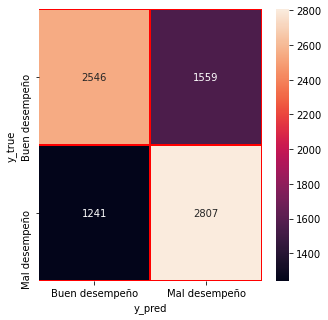

In [82]:
#realizo predicciones y grafico la matriz de confusión
y_pred=rf.predict(X_test)
confusion(y_test,y_pred)

# Entrenamiento modelo: XGB Classifier

In [92]:
#Imports para entrenamiento, predicción y evaluación del modelo
import xgboost as xgb

In [89]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
print("accuracy: ",xgb_model.score(X_test,y_test))

accuracy:  0.6704280632895867


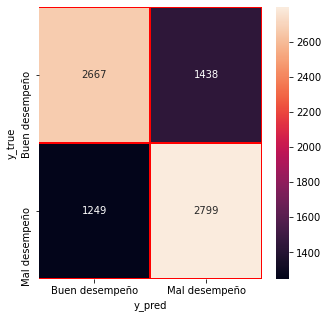

In [91]:
y_pred=xgb_model.predict(X_test)
confusion(y_test,y_pred)

In [93]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(25)

,importancia_relativa
indice_socioeconomico_medio_cat_tercil_alto,0.209835
nivel_id_2,0.131243
gestion_privada,0.076042
provincia_id_4,0.044629
subvencion_No corresponde,0.033103
repeticion_primaria_no,0.028044
provincia_id_6,0.027212
tecnica_f,0.021770
provincia_id_13,0.020923
provincia_id_1,0.020300


### Consideraciones sobre los modelos realizados
Se decidió seguir el camino de una predicción binaria del desempeño del alumno en matemática. La variable target se construyó con las siguientes categorías: buen desempeño en matemática (unificando el desempeño avanzado y el desempeño satisfactorio) cuyo valor es 1, y mal desempeño en matemática (unificando el desempeño básico y por debajo del básico), si bien puede ser arbitrario este agrupamiento, se tomó esta decisión para simplificar el análisis y el modelo.

Se eligieron los modelos de Random Forest y XGBoost. Se entrenó el Random Forest primero con 100 árboles y luego con 1000 para mejorar su accuracy. En ambos casos dió un accuracy de 0,67 a lo que entendemos que su precisión es deficiente, y esto se puede observar en la matriz de confusión donde vemos que el modelo se equivoca en muchos casos con las predicciones del desempeño.

El modelo de XGBoost fue entrenado con hiperparámetros que vienen por default en el modelo, arrojando un mismo valor de accuracy que en el modelo de Random Forest (0,67).

# Conclusiones

En función de la pregunta de investigación planteada: ¿se puede predecir el desempeño de las pruebas Aprender?, concluimos que sí es posible predecir el desempeño en estas pruebas mediante un modelo predictivo.

Como se mostró anteriormente se trabajó con modelos de clasificación binaria para predecir el desempeño bueno o malo de los alumnos evaluados para la prueba de matemática.

La elección de matemática se realizó a los fines de simplificar el problema, entendiendo que es una de las materias elementales en la educación del individuo.


Luego de haber entrenado el modelo, al evaluar el ranking de features que mejor predicen el nivel de desempeño del alumno en matemática, se destacan aquellas variables vinculadas al nivel socioeconómico del alumno y de la escuela, variables vinculadas al nivel de conectividad del alumno, y distribución de recursos del Estado en las jurisdicciones.



### Pasos a seguir
Consideramos que el modelo todavía tiene algunos puntos a profundizar y seguir trabajando, entre los que se resaltan:

*Optimizar hiperparámetros para mejorar su métrica, ya que se probaron dos variantes donde solo se cambió el número de estimadores.

*Mejorar métricas del modelo.

*Segmentar y entrenar un modelo para alumnos de primaria y secundaria por separado.